## DATA ANALYSIS PROJECT

In [1]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading a sample csv file to check the contents

In [2]:
sample_df =pd.read_csv('./Sales_Data/Sales_April_2019.csv')
sample_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [4]:
sample_df.shape

(18383, 6)

In [5]:
sample_df.isna().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [6]:
sample_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


#### Creating a single dataframe combining all the files

In [7]:
files = [file for file in os.listdir("./Sales_Data/")]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [8]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data , df])

all_data.shape

(186850, 6)

In [9]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [11]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
all_data.dropna(how='all',inplace=True)

In [13]:
all_data.shape

(186305, 6)

#### creating a csv file of all combined files

In [14]:
all_data.to_csv('all_data.csv',index=False)

In [15]:
all_data['Product'].nunique()

20

### Creating a new column representing month number 

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [17]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


all_data['Month'] = all_data['Month'].astype('int')



alueError                                Traceback (most recent call last)
Cell In[18], line 1
----> 1 all_data['Month'] = all_data['Month'].astype('int')

File c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py:6240, in NDFrame.astype(self, dtype, copy, errors)
   6233     results = [
   6234         self.iloc[:, i].astype(dtype, copy=copy)
   6235         for i in range(len(self.columns))
   6236     ]
   6238 else:
   6239     # else, only a single dtype is given
-> 6240     new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
   6241     return self._constructor(new_data).__finalize__(self, method="astype")
   6243 # GH 33113: handle empty frame or series

File c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py:448, in BaseBlockManager.astype(self, dtype, copy, errors)
    447 def astype(self: T, dtype, copy: bool = False, errors: str = "raise") -> T:
--> 448     return self.apply("astype", dtype=dtype, copy=copy, errors=errors)

File c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py:352, in BaseBlockManager.apply(self, f, align_keys, ignore_failures, **kwargs)
    350         applied = b.apply(f, **kwargs)
    351     else:
--> 352         applied = getattr(b, f)(**kwargs)
    353 except (TypeError, NotImplementedError):
...
    169     # Explicit copy, or required since NumPy can't view from / to object.
--> 170     return arr.astype(dtype, copy=True)
    172 return arr.astype(dtype, copy=copy)

ValueError: invalid literal for int() with base 10: 'Or'




In [18]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.shape

(185950, 7)

In [19]:
all_data['Month'] = all_data['Month'].astype('int')

In [20]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


In [21]:
converted_data = ['Order ID','Quantity Ordered','Price Each']
all_data[converted_data] = all_data[converted_data].apply(pd.to_numeric)

In [22]:
all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [26]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


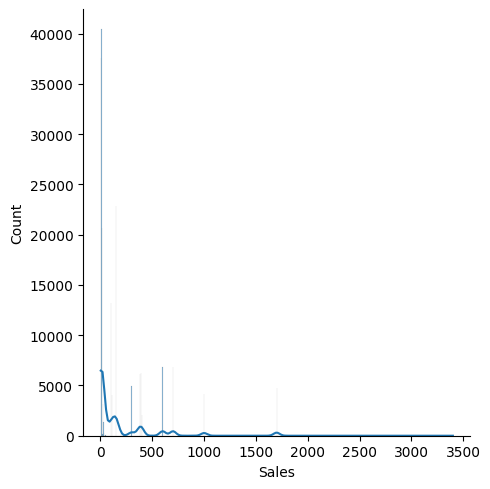

In [70]:
sns.displot(all_data['Sales'],kde=True)
plt.savefig('./plots and graphs/distribution of sale.png')

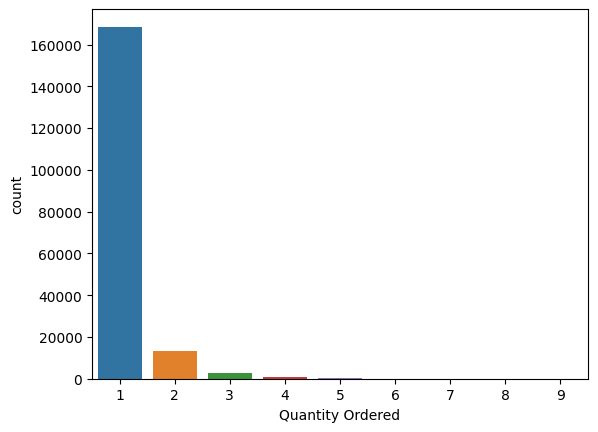

In [71]:
sns.countplot(x='Quantity Ordered',data = all_data)
plt.savefig('./plots and graphs/count of number of items.png')

#### What was the best month for sale and how many orderes were placed 

In [29]:
sale_per_month = all_data.groupby('Month').sum()

In [31]:
sale_per_month

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1421630798,10903,1811768.38,1822256.73
2,1871052592,13449,2188884.72,2202022.42
3,2564810956,17005,2791207.83,2807100.38
4,3387347100,20558,3367671.02,3390670.24
5,3345871523,18667,3135125.13,3152606.75
6,2932976072,15253,2562025.61,2577802.26
7,3284139576,16072,2632539.56,2647775.76
8,2899373917,13448,2230345.42,2244467.88
9,2948726831,13109,2084992.09,2097560.13


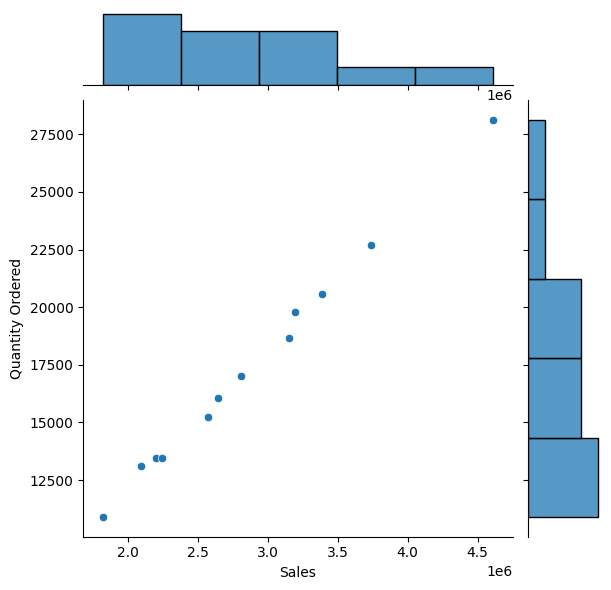

In [72]:
sns.jointplot(x='Sales',y='Quantity Ordered',data = sale_per_month , kind='scatter')
plt.savefig('./plots and graphs/quantity vs sales of each month.png')

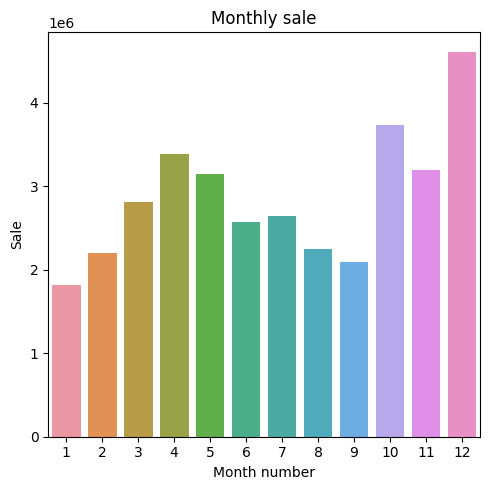

In [73]:
plt.figure(figsize=(5,5))
ax= sns.barplot(x =sale_per_month.index,y='Sales',data=sale_per_month)
plt.xlabel('Month number')
plt.ylabel('Sale')
plt.title('Monthly sale')
plt.tight_layout()
plt.savefig('./plots and graphs/sales each month.png')

In [50]:
def extract_city(city):
    return city.split(",")[1]

def extract_state(state):
    return state.split(", ")[2].split(" ")[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : extract_city(x) + " " + extract_state(x) )
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle WA
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta GA
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston MA


In [48]:
all_data['City'].nunique()

9

In [51]:
sale_per_city = all_data.groupby('City').sum()
sale_per_city

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,3423838407,16602,2779908.20,104794,2795498.58
Austin TX,2280982185,11153,1809873.61,69829,1819581.75
Boston MA,4598265261,22528,3637409.77,141112,3661642.01
Dallas TX,3415643578,16730,2752627.82,104620,2767975.40
Los Angeles CA,6811084693,33289,5421435.23,208325,5452570.80
New York City NY,5736333884,27932,4635370.83,175741,4664317.43
Portland ME,563266345,2750,447189.25,17144,449758.27
Portland OR,2305594747,11303,1860558.22,70621,1870732.34
San Francisco CA,10304443952,50239,8211461.74,315520,8262203.91


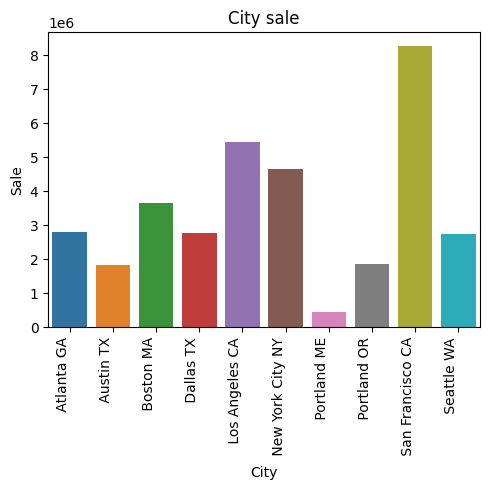

In [74]:
plt.figure(figsize=(5,5))
ax= sns.barplot(x =sale_per_city.index,y='Sales',data=sale_per_city)
plt.xlabel('City')
plt.ylabel('Sale')
plt.title('City sale')
plt.xticks(rotation =90,ha='right')
plt.tight_layout()
plt.savefig('./plots and graphs/sales for each city.png')